The goal is to use the automatically saved output of the Kindle_scribe_my_clippings_reader_polars_cupy.ipynb notebook as an input for a local language model to fine tune on local source text. A convenient example is found from Intel in their OpenVINO notebook examples, specifically notebook 213-question-answering.ipynb (https://github.com/openvinotoolkit/openvino_notebooks/tree/main/notebooks/213-question-answering).

I modified the notebook by adding the following cells to replace the example's hard coded text with the dataframe (cell 15 in Intel's example notebook):

In [ ]:
# this loads the Kindle Scribe clippings dataframe as the local source text
# combines source with quote columns to constitute the local source text
# interesting first experiment with a convenient LLM to interrogate local source clippings

import polars as pl 
# the csv file was automatically saved previously
new_df = pl.read_csv('kindle_scribe_new_df.csv')
new_df2 = new_df.with_columns(
    pl.concat_str(
        [pl.col("source"),
         pl.lit("says"),
         pl.col("quote")],
         separator=" ",
    ).alias('text'),
)

with pl.Config(fmt_str_lengths=500, tbl_rows=30):
    display(new_df2['text'])

In [ ]:
# input kindle clippings as sources
# run in interactive mode by setting example_question=None
# replaces the hard coded text in Intel's example with the selected dataframe text from Kindle Scribe clippings
sources = new_df2['text']

question = "What is the term for a task that generally lends itself to being solved by a computer?"

# example_question=None sets it to interactive mode:
run_question_answering(sources, example_question=None)

A sample run provides mixed results but it is responsive. It is certainly not production ready and is more a curiosity. But with the right question it is fairly accurate.

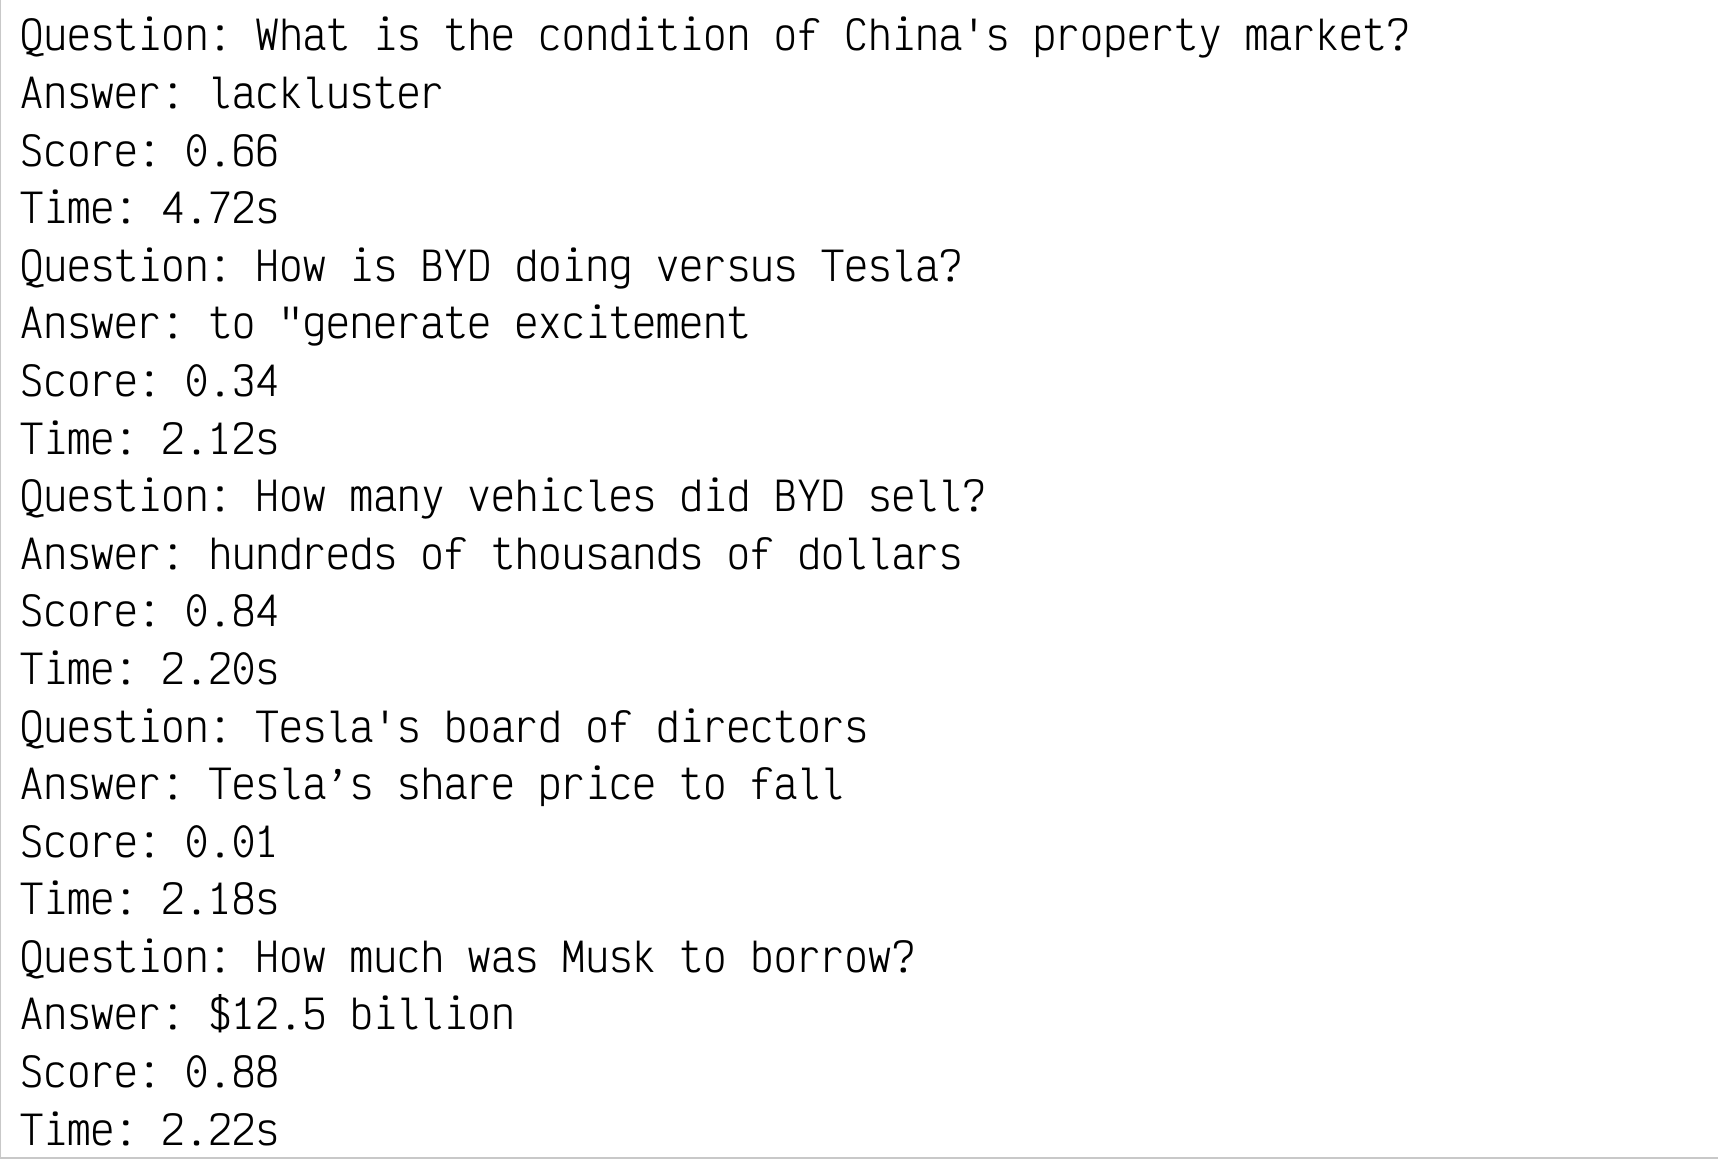